In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\AVANI
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load the dataset from a local path or Kaggle location
df = pd.read_csv("C:\\Users\\Sreelakshmi\\Downloads\\archive (7)\\training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', header=None)

# Assign column names to the dataset (as it has no header)
df.columns = ['target', 'tweet_id', 'date', 'flag', 'user', 'text']

# View the first few rows of the dataset
df.head()

,target,tweet_id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
# Simplify sentiment labeling: 0 = negative, 1 = positive
df['target'] = df['target'].replace(4, 1)

# Keep only the relevant columns
df = df[['target', 'text']]

# Check for missing values
df.isnull().sum()

# Drop rows with missing values
df = df.dropna()

# View cleaned data
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis
df['sentiment_score'] = df['text'].apply(get_sentiment)

# Classify sentiment as positive, neutral, or negative based on score
df['vader_sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))

# View the sentiment analysis results
df[['text', 'vader_sentiment', 'sentiment_score']].head()

,text,vader_sentiment,sentiment_score
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,-0.0173
1,is upset that he can't update his Facebook by ...,negative,-0.7500
2,@Kenichan I dived many times for the ball. Man...,positive,0.4939
3,my whole body feels itchy and like its on fire,negative,-0.2500
4,"@nationwideclass no, it's not behaving at all....",negative,-0.6597


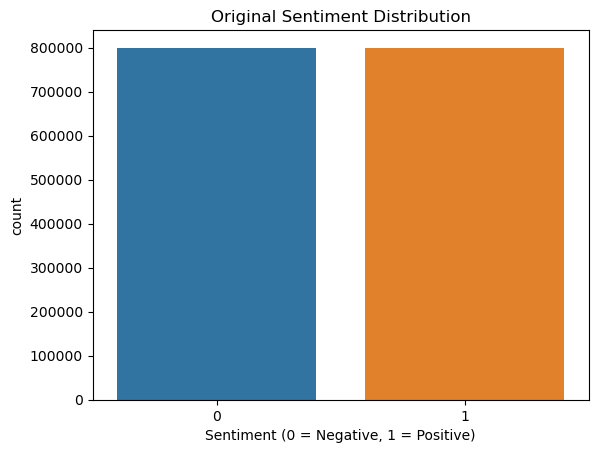

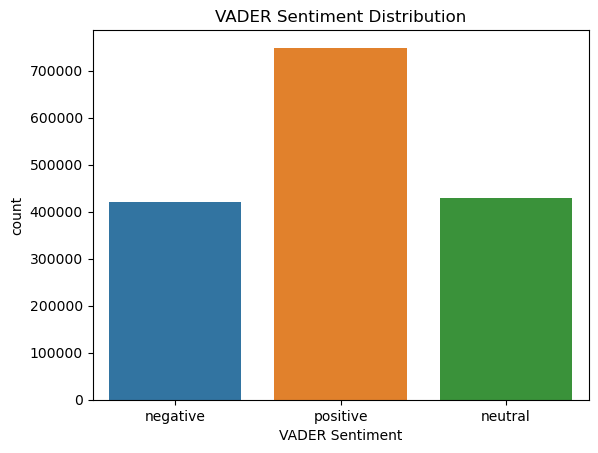

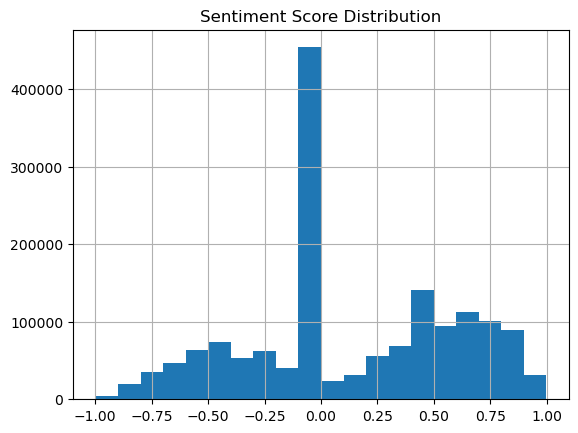

In [8]:
# Plot sentiment distribution from original labels
sns.countplot(x='target', data=df)
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.show()

# Plot VADER sentiment distribution
sns.countplot(x='vader_sentiment', data=df)
plt.title('VADER Sentiment Distribution')
plt.xlabel('VADER Sentiment')
plt.show()

# Plot sentiment score distribution
df['sentiment_score'].hist(bins=20)
plt.title('Sentiment Score Distribution')
plt.show()

In [9]:
X = df['text']  # Features (tweet text)
y = df['target']  # Labels (sentiment)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the tweet text
vectorizer = CountVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    159494
           1       0.75      0.79      0.77    160506

    accuracy                           0.76    320000
   macro avg       0.77      0.76      0.76    320000
weighted avg       0.77      0.76      0.76    320000

